In [14]:
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display  # for display(img)



sdf_path = "100_time_steps_generated_samples.sdf"  # path to your SDF file

# Read SDF
suppl = Chem.SDMolSupplier(sdf_path, removeHs=False)  # keep hydrogens (removeHs=False)

# Convert to a regular list and filter out invalid molecules
mols = [mol for mol in suppl if mol is not None]

print(f"Total molecules in file: {len(mols)}")


Total molecules in file: 5045


In [15]:
# Take the first two molecules
m0 = mols[1]
m1 = mols[2]

print("1")
for atom in m0.GetAtoms():
    idx = atom.GetIdx()
    symbol = atom.GetSymbol()
    charge = atom.GetFormalCharge()
    print(f"  Index: {idx:2d}, element: {symbol}, charge: {charge}")


1
  Index:  0, element: C, charge: 0
  Index:  1, element: C, charge: 0
  Index:  2, element: O, charge: 0
  Index:  3, element: C, charge: 0
  Index:  4, element: N, charge: 0
  Index:  5, element: C, charge: 0
  Index:  6, element: N, charge: 0
  Index:  7, element: C, charge: 0
  Index:  8, element: N, charge: 0
  Index:  9, element: C, charge: 0
  Index: 10, element: C, charge: 0
  Index: 11, element: N, charge: 0
  Index: 12, element: C, charge: 0
  Index: 13, element: O, charge: 0
  Index: 14, element: O, charge: 0
  Index: 15, element: C, charge: 0
  Index: 16, element: C, charge: 0
  Index: 17, element: C, charge: 0
  Index: 18, element: O, charge: 0
  Index: 19, element: C, charge: 0
  Index: 20, element: C, charge: 0
  Index: 21, element: C, charge: 0
  Index: 22, element: C, charge: 0
  Index: 23, element: C, charge: 0
  Index: 24, element: C, charge: 0
  Index: 25, element: C, charge: 0
  Index: 26, element: O, charge: 0
  Index: 27, element: O, charge: 0
  Index: 28, eleme

In [16]:
from Main import conf

print("First few atom coordinates:")
for i in range(min(10, m0.GetNumAtoms())):
    pos = conf.GetAtomPosition(i)
    print(f"  Atom {i:2d}: x={pos.x:.3f}, y={pos.y:.3f}, z={pos.z:.3f}")


First few atom coordinates:
  Atom  0: x=-7.713, y=2.911, z=0.478
  Atom  1: x=-7.484, y=1.396, z=0.334
  Atom  2: x=-8.446, y=0.878, z=-0.759
  Atom  3: x=-7.795, y=0.675, z=1.660
  Atom  4: x=-6.098, y=1.141, z=-0.065
  Atom  5: x=-4.983, y=1.907, z=0.240
  Atom  6: x=-3.891, y=1.321, z=-0.267
  Atom  7: x=-4.283, y=0.163, z=-0.893
  Atom  8: x=-3.458, y=-0.867, z=-1.438
  Atom  9: x=-3.512, y=-2.111, z=-0.553


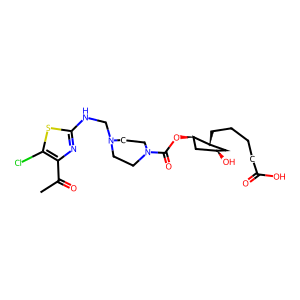

In [17]:
# 2D
img = Draw.MolToImage(m0, size=(300, 300))
display(img)

In [18]:
import py3Dmol

# Convert molecules to molblock text (for 3D visualization)
mb = Chem.MolToMolBlock(m0)
mb1 = Chem.MolToMolBlock(m1)

view = py3Dmol.view(width=400, height=400)
view.addModel(mb, "sdf")
# view.addModel(mb1, "sdf")  # optional second model

# Set visualization style
view.setStyle({
    'stick': {'radius': 0.15},
    'sphere': {'scale': 0.3}
})

view.zoomTo()
view.show()


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [19]:
mb1 = Chem.MolToMolBlock(m1)

view = py3Dmol.view(width=400, height=400)
#view.addModel(mb, "sdf")
view.addModel(mb1, "sdf")
#view.setStyle({'stick': {}})  # sticks
view.setStyle({
    'stick': {'radius': 0.15},
    'sphere': {'scale': 0.3}
})
view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [20]:
from rdkit.Chem import rdMolAlign, rdShapeHelpers

# Initial alignment (optional refinement)
o3a = rdMolAlign.GetO3A(mols[1], mols[2])
o3a.Align()

ref = Chem.AddHs(mols[1], addCoords=True)
probe = Chem.AddHs(mols[2], addCoords=True)

# 1. O3A alignment: align probe onto ref
o3a = rdMolAlign.GetO3A(probe, ref)   # order: first probe, then ref
rmsd = o3a.Align()                    # modifies probe coordinates in place

print("RMSD after O3A:", rmsd)  # deviation between molecules

# 2. Shape Tanimoto distance (0 = identical shapes, 1 = completely different)
dist = rdShapeHelpers.ShapeTanimotoDist(ref, probe)
sim = 1.0 - dist                      # similarity = 1 - distance

print("Shape Tanimoto distance:", dist)
print("Shape Tanimoto similarity:", sim)


RMSD after O3A: 0.5736782352384009
Shape Tanimoto distance: 0.5726654298082869
Shape Tanimoto similarity: 0.42733457019171306


[17:54:52] Molecule does not have explicit Hs. Consider calling AddHs()
[17:54:52] Molecule does not have explicit Hs. Consider calling AddHs()
